## Imports

In [4]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns              # more advanced visual plotting library
import librosa, librosa.display

In [5]:
file = "2186_vs6_1.mid"
file2 = "Savfk - United We Stand.wav"
file3 = "aaa.flac"

In [6]:
signal, sample_rate = librosa.load(file3)

In [7]:
print(signal)

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(sample_rate)

22050


In [9]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

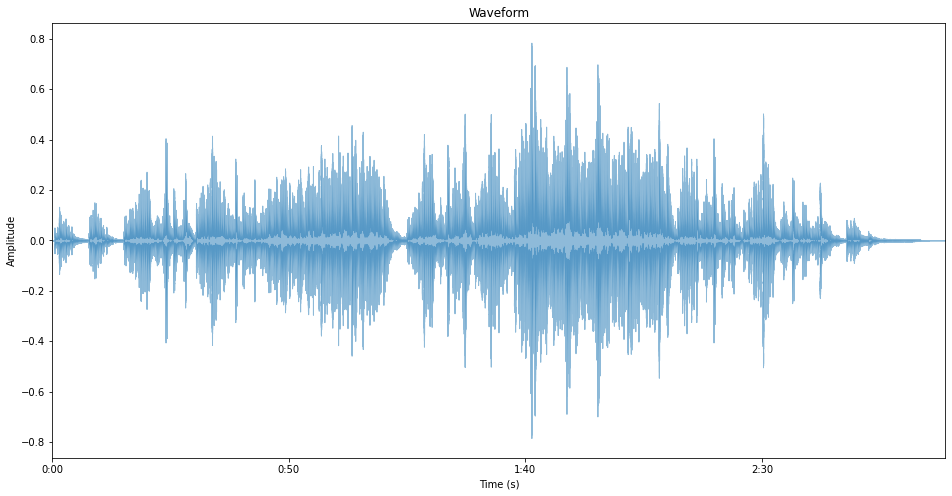

In [10]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [11]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

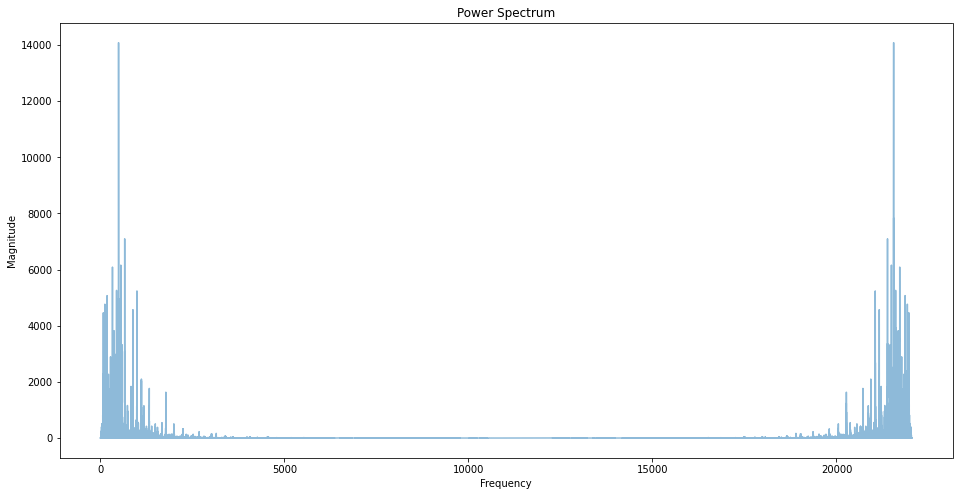

In [12]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [13]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

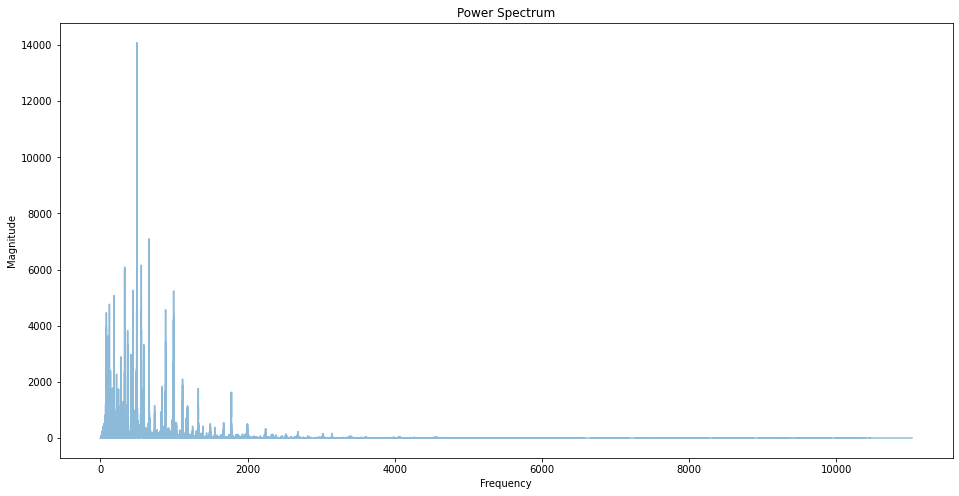

In [14]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [15]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

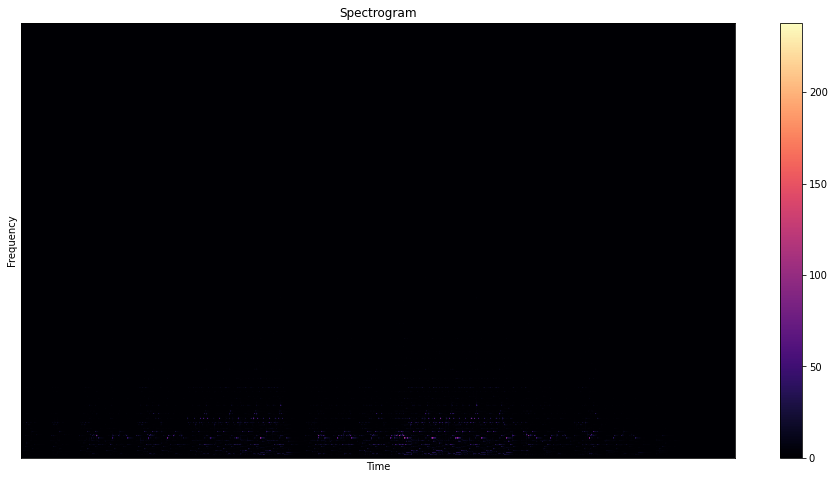

In [16]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [17]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

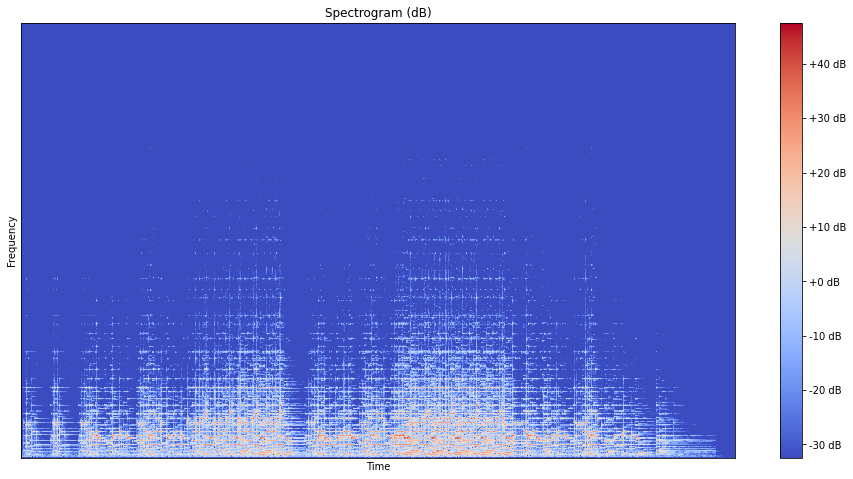

In [18]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [19]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

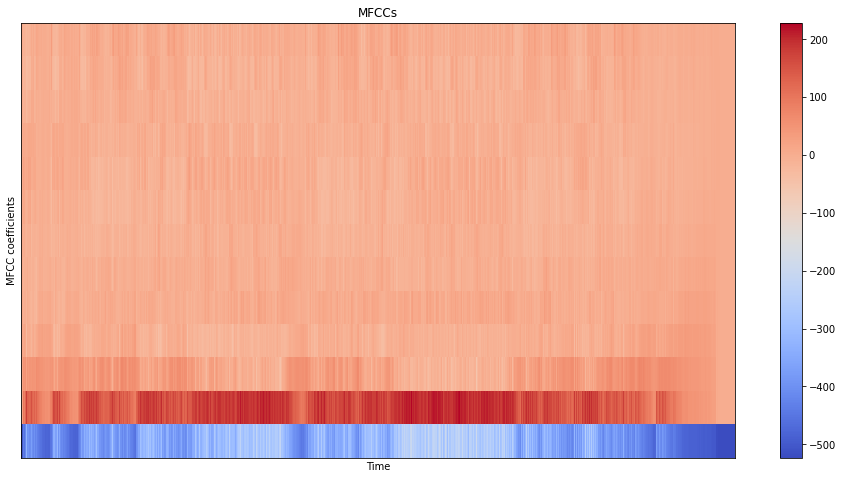

In [20]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")